In [1]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

In [2]:
# import data
data = pd.read_csv('data/winequality-red.csv', sep=';')

In [3]:
# create target column
data['good_quality'] = [1 if x >= 7 else 0 for x in data['quality'] ]

In [4]:
X = data.drop(columns=['quality','good_quality'])
y = data['good_quality']

In [5]:
oversample = RandomOverSampler(sampling_strategy='minority')

X, y = oversample.fit_resample(X, y)

In [6]:
#=========================
# modelling
#=========================


def crossExperiment(model, modelname):
    
    from sklearn.model_selection import cross_validate
    from sklearn.metrics import roc_auc_score, accuracy_score

    scoring = {'roc_auc_score': 'roc_auc', 
               'accuracy_score': 'accuracy'}

    scores = cross_validate(model, X, y, scoring=scoring, cv=10)
    
    scores = pd.DataFrame(scores)
    
    scores['model'] = modelname
    
    return scores

In [7]:
from sklearn.tree import DecisionTreeClassifier

treee = crossExperiment(DecisionTreeClassifier(), 'Decision Tree')

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = crossExperiment(RandomForestClassifier(), 'Random Forest')

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = crossExperiment(KNeighborsClassifier(n_neighbors=3), 'KNN')

In [10]:
# combinar resultados
results = pd.concat([treee, rf, knn])

results.to_csv('results/results_cv.csv', index=False)

### Explicabilidade via Árvore de Decisão

In [11]:
# arvore de decisao
treee =  DecisionTreeClassifier()

treee.fit(X, y)

DecisionTreeClassifier()

In [12]:
importance = pd.DataFrame({'feature':list(X.columns),'importance':list(treee.feature_importances_)})

In [13]:
importance.to_csv('results/feature_importance.csv')

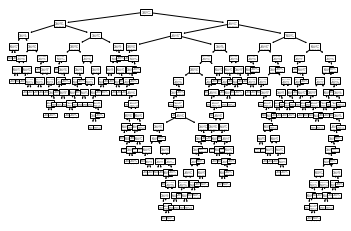

In [14]:
from sklearn import tree

tree.plot_tree(treee)
plt.show()

In [ ]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(treee, X, y,
                target_name="target",
                feature_names=list(X.columns),
                class_names=['ruim', 'bom'])

viz.save("results/decistion_tree_viz.svg")

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(treee, 
                   feature_names=list(X.columns),  
                   class_names= ['ruim', 'bom'],
                   filled=True)

fig.savefig("results/decistion_tree.png")

In [ ]:
text_representation = tree.export_text(treee)
print(text_representation)